In [1]:
from diagrams import Diagram, Cluster
from diagrams.aws.storage import S3
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker
from diagrams.custom import Custom

# Paths to custom icons for each service
cfa_logo = "input_icons/CFAI.png"
docling_logo = "input_icons/docling.png"
openai_logo = "input_icons/OpenAI.png"
pinecone_logo = "input_icons/pinecone.png"

with Diagram("PDF Parsing and Vector Storage Architecture with Docker and Airflow", show=False) as diag:
    
    # Main Cluster for Entire Workflow, including Orchestration and Processing Components
    with Cluster("PDF Parsing and Embedding Workflow"):
        
        # Orchestration Components
        airflow = Airflow("Airflow Orchestrator")
        docker = Docker("Docker Container")

        # CFAI Website and Docling for Document Fetching and Parsing
        cfai = Custom("CFAI Documents", cfa_logo)
        docling = Custom("Docling Library", docling_logo)
        
        # S3 bucket for storing images
        images = S3("Images Storage")

        # Embedding and Indexing components
        with Cluster("Embedding and Indexing"):
            openai_model = Custom("OpenAI Embeddings", openai_logo)
            pinecone = Custom("Pinecone Index", pinecone_logo)
        
        # Workflow connections within the main cluster
        cfai >> docling >> [images, openai_model]
        openai_model >> pinecone


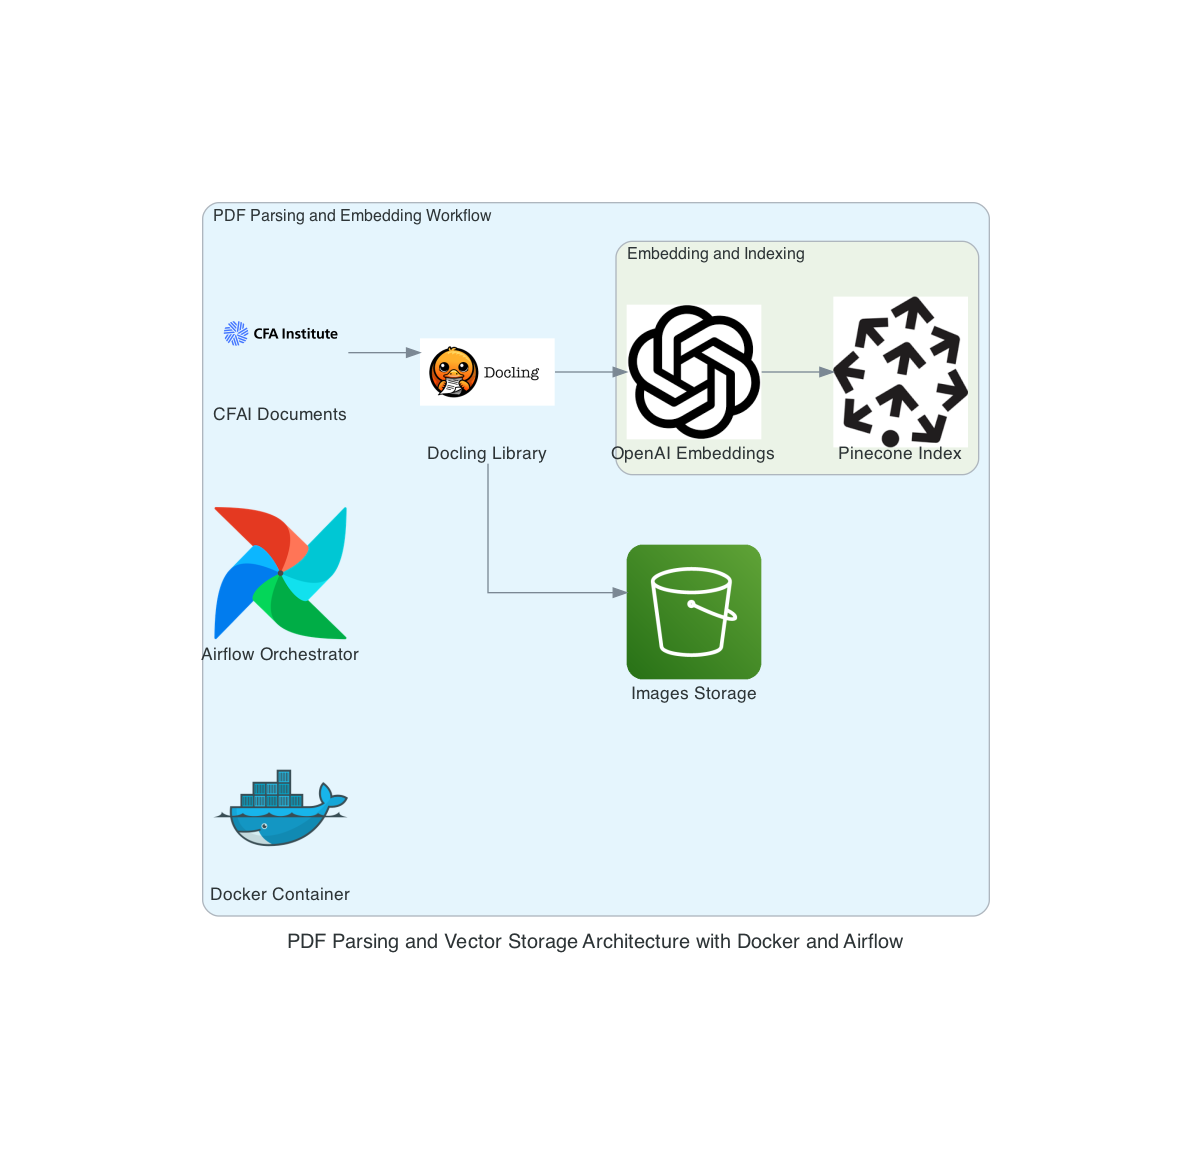

In [2]:
diag

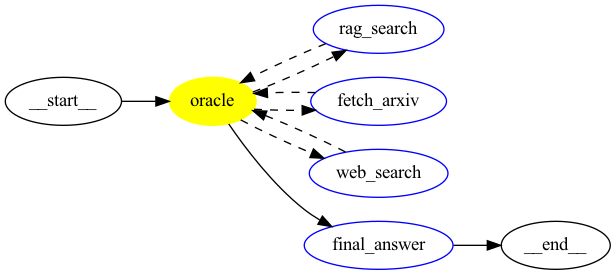

In [3]:
from graphviz import Digraph
from IPython.display import display, Image

# Create a directed graph
diagram = Digraph("LangGraph Oracle and Agents", format="png")
diagram.attr(rankdir="LR")  # Arrange nodes from left to right

# Define start and end nodes
diagram.node("start", "__start__", shape="ellipse", color="black")
diagram.node("end", "__end__", shape="ellipse", color="black")

# Define the Oracle node
diagram.node("oracle", "oracle", shape="ellipse", style="filled", color="yellow")

# Define sub-agent nodes
diagram.node("rag_search", "rag_search", shape="ellipse", color="blue")
diagram.node("fetch_arxiv", "fetch_arxiv", shape="ellipse", color="blue")
diagram.node("web_search", "web_search", shape="ellipse", color="blue")
diagram.node("final_answer", "final_answer", shape="ellipse", color="blue")

# Connect nodes to simulate back-and-forth interaction with Oracle
diagram.edge("start", "oracle")
diagram.edge("oracle", "rag_search", style="dashed")
diagram.edge("rag_search", "oracle", style="dashed")
diagram.edge("oracle", "fetch_arxiv", style="dashed")
diagram.edge("fetch_arxiv", "oracle", style="dashed")
diagram.edge("oracle", "web_search", style="dashed")
diagram.edge("web_search", "oracle", style="dashed")

# Connect Oracle to final answer
diagram.edge("oracle", "final_answer")
diagram.edge("final_answer", "end")

# Render the graph to an in-memory file and display it inline
diagram_path = diagram.render(filename='langgraph_oracle_architecture', format='png')
display(Image(filename=diagram_path))


In [4]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import User
from diagrams.programming.framework import FastAPI
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.generic.database import SQL
from diagrams.generic.device import Tablet

# Define the icons for custom nodes (if needed, provide paths for custom icons)
user_icon = "input_icons/user.png" 
streamlit_icon = "input_icons/streamlit.png"  
langgraph_icon = "input_icons/langgraph.png" 
pdf_icon = "input_icons/pdf_download.png"
codelabs_icon = "input_icons/codelab_download.png"
snow_flake = "input_icons/snowflake.png" 

with Diagram("User Interaction with FastAPI Endpoints", show=False) as diag:
    # User node
    user = User("User")

    # Streamlit node
    streamlit = Custom("Streamlit", streamlit_icon) if streamlit_icon else Python("Streamlit")

    # FastAPI node
    fastapi = FastAPI("FastAPI")

    # FastAPI Endpoints cluster
    with Cluster("FastAPI Endpoints"):
        snowflake = Custom("Snowflake Metadata table", snow_flake)
        s3 = S3("S3 Bucket")
        langgraph_agent = Custom("LangGraph Agent", langgraph_icon) if langgraph_icon else Python("LangGraph Agent")
        download_pdf = Custom("Download PDF", pdf_icon) if pdf_icon else Tablet("Download PDF")
        download_codelabs = Custom("Download Codelabs", codelabs_icon) if codelabs_icon else Tablet("Download Codelabs")

    # Define the workflow connections
    user >> streamlit >> fastapi
    fastapi >> Edge(label="Query") >> snowflake
    fastapi >> Edge(label="File Storage") >> s3
    fastapi >> Edge(label="Language Processing") >> langgraph_agent
    fastapi >> Edge(label="Download PDF") >> download_pdf
    fastapi >> Edge(label="Download Codelabs") >> download_codelabs


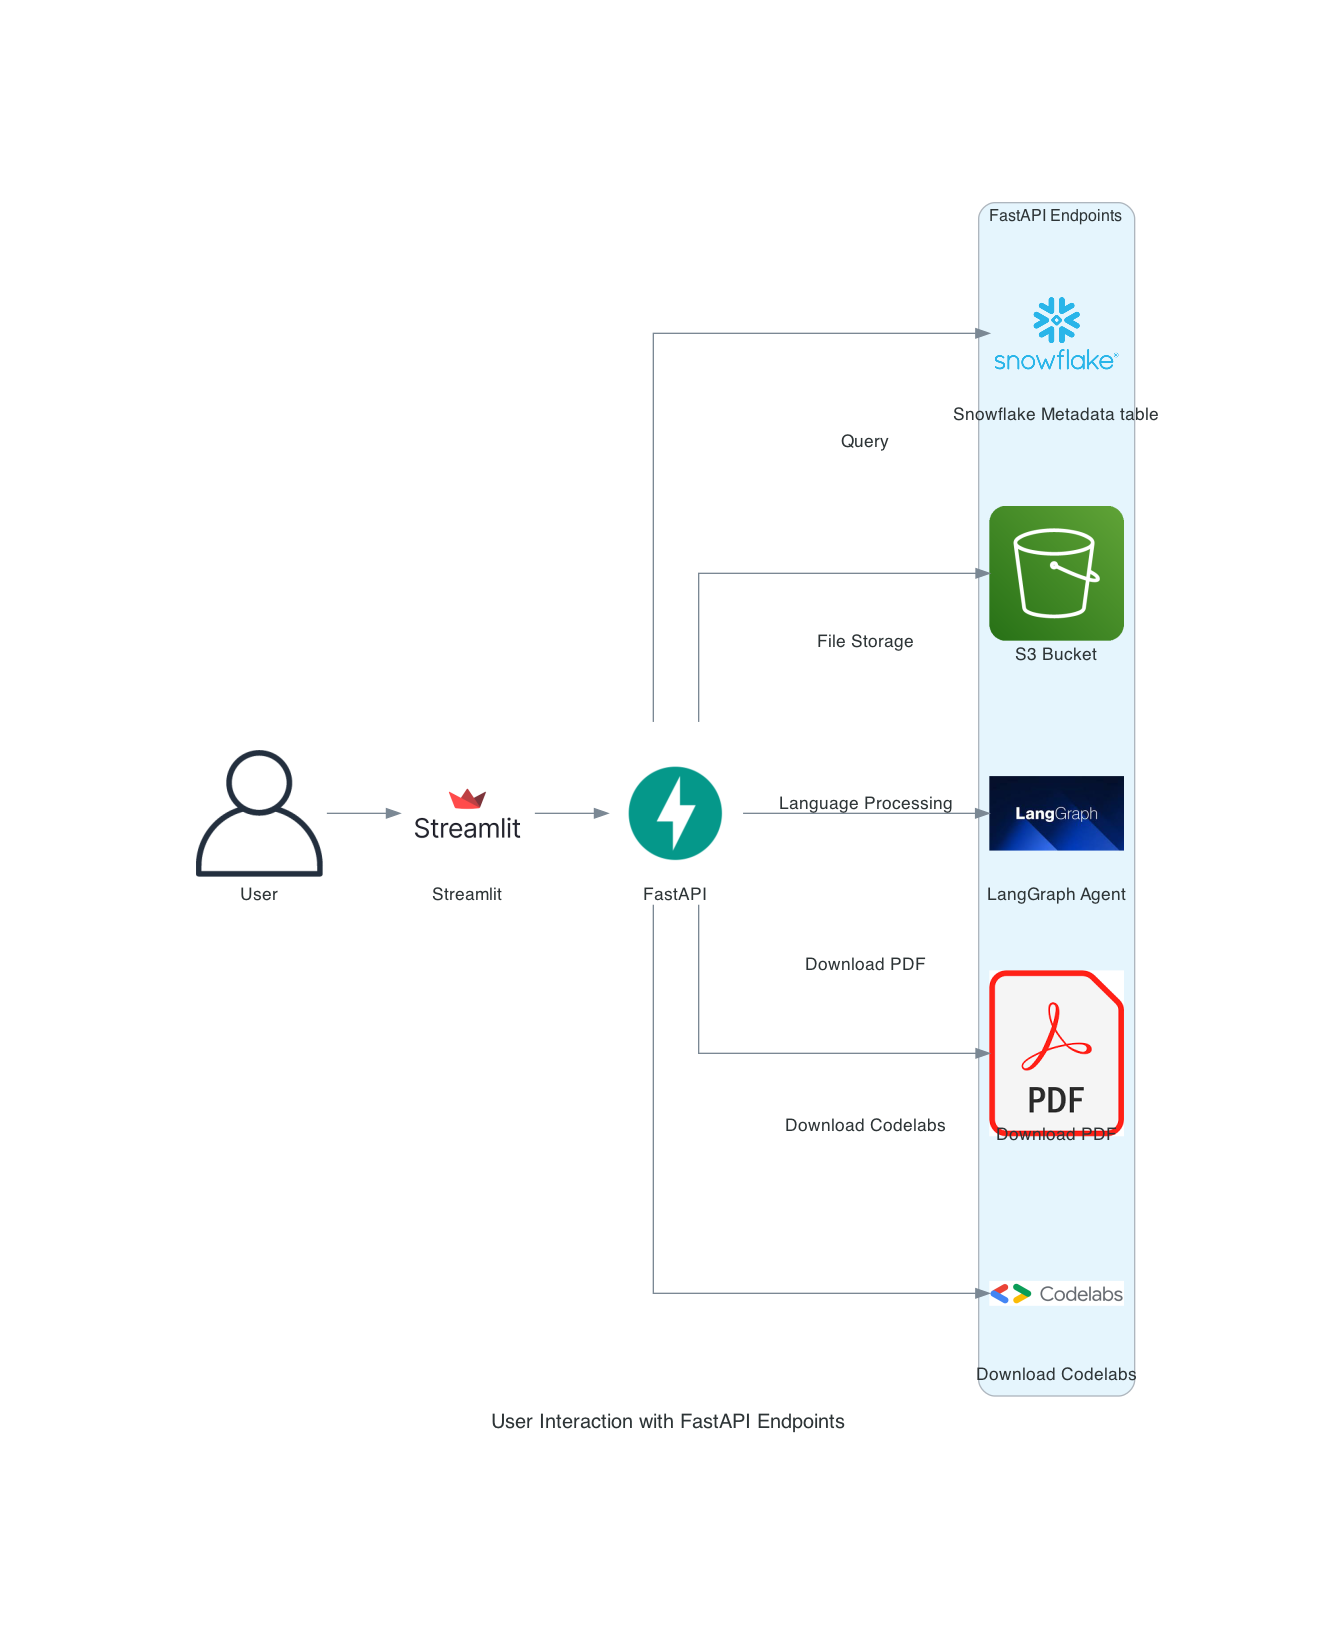

In [5]:
diag